In [1]:
import sympy as smp

In [2]:
x, r0 = smp.symbols('x, r_0')
y = smp.symbols('y', cls=smp.Function)

y = y(x)

In [3]:
n = smp.sqrt(x**2 + y**2)/r0
n

sqrt(x**2 + y(x)**2)/r_0

In [4]:
dy = smp.diff(y,x)
d2y = smp.diff(dy, x)

In [5]:
L = n*smp.sqrt(1+dy)
L

sqrt(x**2 + y(x)**2)*sqrt(Derivative(y(x), x) + 1)/r_0

In [6]:
dLdy = smp.diff(L, y)
dLdy

sqrt(Derivative(y(x), x) + 1)*y(x)/(r_0*sqrt(x**2 + y(x)**2))

In [7]:
dLddy = smp.diff(L, dy)
dLddy

sqrt(x**2 + y(x)**2)/(2*r_0*sqrt(Derivative(y(x), x) + 1))

In [8]:
dLddydx = smp.diff(dLddy, x)
dLddydx

(x + y(x)*Derivative(y(x), x))/(2*r_0*sqrt(x**2 + y(x)**2)*sqrt(Derivative(y(x), x) + 1)) - sqrt(x**2 + y(x)**2)*Derivative(y(x), (x, 2))/(4*r_0*(Derivative(y(x), x) + 1)**(3/2))

In [9]:
EL = smp.Eq(dLddydx, dLdy).simplify()
EL

Eq(sqrt(Derivative(y(x), x) + 1)*y(x)/(r_0*sqrt(x**2 + y(x)**2)), (2*(x + y(x)*Derivative(y(x), x))*(Derivative(y(x), x) + 1) - (x**2 + y(x)**2)*Derivative(y(x), (x, 2)))/(4*r_0*sqrt(x**2 + y(x)**2)*(Derivative(y(x), x) + 1)**(3/2)))

In [10]:
sln = smp.solve(EL, d2y)
sln

[2*(x*Derivative(y(x), x) + x - y(x)*Derivative(y(x), x)**2 - 3*y(x)*Derivative(y(x), x) - 2*y(x))/(x**2 + y(x)**2)]

In [13]:
a,b = smp.symbols('A,B')
k=3
EQ1 = smp.Eq(5**2, k**2 * b - (1 + a)**2)
EQ2 = smp.Eq(5**2, k**2 * b - (6 + a)**2)

smp.solve([EQ1, EQ2], (a,b), dict=True)


[{A: -7/2, B: 125/36}]

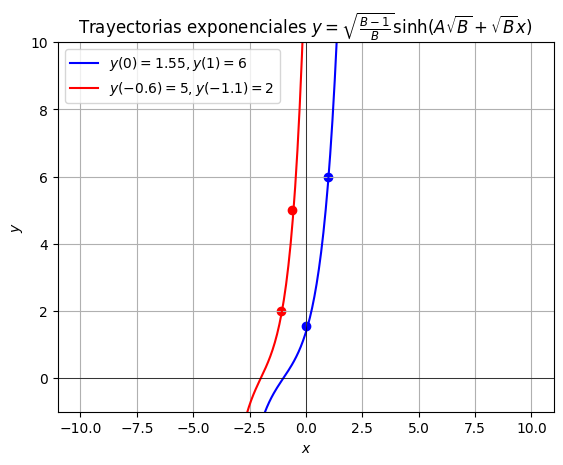

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of x values
x = np.linspace(-10, 10, 400)

# Define the parameters for the three hyperbolas
A_values = [1, 2]  # Adjust the scale of the hyperbolas
B_values = [2, 3]  # Adjust the horizontal shift of the hyperbolas
colors = ('blue', 'red', 'green')
points = [[[0,1.55],[1,6]], [[-0.6,5],[-1.1,2]]]  # Points and their coordinates

# Plot each hyperbola
for i in range(len(A_values)):
    y = np.sqrt((B_values[i]-1)/B_values[i]) * np.sinh(A_values[i] * np.sqrt(B_values[i]) + np.sqrt(B_values[i]) * x)
    plt.plot(x, y, label=f"$y({points[i][0][0]})={points[i][0][1]}, y({points[i][1][0]}) = {points[i][1][1]}$", color = colors[i])
    plt.scatter([point[0] for point in points[i]], [point[1] for point in points[i]], color=colors[i])

# Add labels and legend
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.ylim((-1, 10))
plt.title(r'Trayectorias exponenciales $y= \sqrt{\frac{B-1}{B}} \sinh(A \sqrt{B} + \sqrt{B} x)$')
plt.legend()

# Show the plot
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()